In [104]:
##Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import os

In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
##Loading the dataset
housing_df = pd.read_csv("train.csv")

In [4]:
## head of housing df
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
## Understand shape of data set
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
## To understand shape of the dataset
housing_df.shape

(1460, 81)

In [9]:
## To know how many null's are there
housing_df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [10]:
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Length: 81, dtype: float64

In [11]:
## Data Cleaning & EDA
housing_df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [13]:
housing_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [ ]:
housing['MiscFeature'].value_counts()

In [15]:
## Dropping few columns as we do not need them for analysis

housing_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis =1, inplace = True)

In [17]:
# Checking the percentage of null values in the ddta set
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2).sort_values(ascending=False)

FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
                 ...  
CentralAir        0.00
HeatingQC         0.00
SaleCondition     0.00
TotalBsmtSF       0.00
Id                0.00
Length: 77, dtype: float64

In [18]:
## Checking few columns and their distribution as to see if they make any sense
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].replace(np.nan, 'NA')

In [20]:
housing_df['FireplaceQu'].value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [22]:
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].replace(np.nan, 'NA')

In [23]:
housing_df['FireplaceQu'].value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [24]:
housing_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

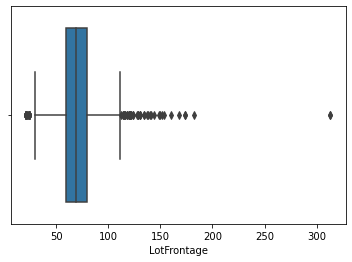

In [28]:
sns.boxplot('LotFrontage', data = housing_df)

In [29]:
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median())

In [31]:
housing_df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [35]:
import datetime as d
current_year = int(d.datetime.now().year)

In [37]:
housing_df['GarageYrBlt'] = current_year-housing_df['GarageYrBlt']

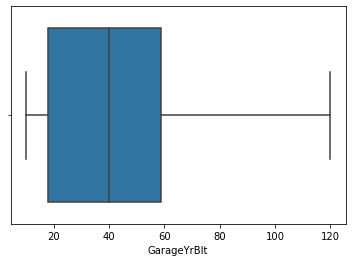

In [39]:
sns.boxplot('GarageYrBlt', data = housing_df)

In [43]:
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(housing_df['GarageYrBlt'].mean())

In [45]:
housing_df['YrSold'] = current_year-housing_df['YrSold']

In [46]:
housing_df['YearBuilt'] = current_year-housing_df['YearBuilt']

In [47]:
housing_df['YearRemodAdd'] = current_year-housing_df['YearRemodAdd']

In [49]:
housing_df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [52]:
housing_df['GarageType'] = housing_df['GarageType'].replace(np.nan, 'NA')

In [53]:
housing_df['GarageFinish'] = housing_df['GarageFinish'].replace(np.nan, 'NA')

In [55]:
housing_df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [56]:
housing_df['GarageQual'] = housing_df['GarageQual'].replace(np.nan, 'NA')

In [57]:
housing_df['GarageCond'] = housing_df['GarageCond'].replace(np.nan, 'NA')

In [58]:
housing_df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [59]:
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].replace(np.nan, 'NA')

In [60]:
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].replace(np.nan, 'NA')

In [61]:
housing_df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [62]:
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].replace(np.nan, 'NA')

In [63]:
housing_df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [64]:
housing_df['BsmtCond'] = housing_df['BsmtCond'].replace(np.nan, 'NA')

In [65]:
housing_df['BsmtQual'] = housing_df['BsmtQual'].replace(np.nan, 'NA')

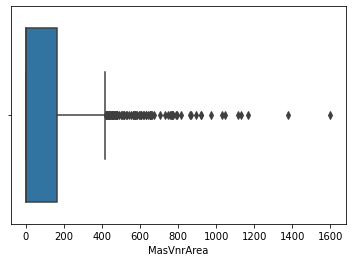

In [67]:
sns.boxplot('MasVnrArea', data = housing_df)

In [68]:
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(housing_df['MasVnrArea'].median())

In [69]:
housing_df['MasVnrArea'].isnull().sum()

0

In [70]:
housing_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [71]:
housing_df['MasVnrType'].mode()

0    None
dtype: object

In [72]:
housing_df['MasVnrType'] = housing_df['MasVnrType'].replace(np.nan, 'None')

In [73]:
housing_df['MasVnrType'].isnull().sum()

0

In [75]:
housing_df['Electrical'] = housing_df['Electrical'].replace(np.nan, 'SBrkr')

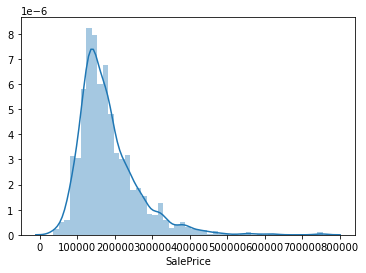

In [76]:
sns.distplot(housing_df['SalePrice'])

In [77]:
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [78]:
housing_df['log_value'] = np.log(housing_df['SalePrice'])

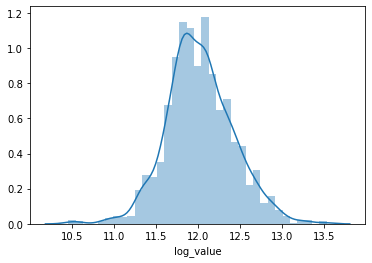

In [79]:
sns.distplot(housing_df['log_value'])

In [81]:
housing_df['MSSubClass'] = housing_df['MSSubClass'].astype(object)

In [83]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [85]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_value
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,12,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,13,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,12,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,14,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,12,WD,Normal,250000,12.429216


In [ ]:
#Dropping the columns
housing_df.drop(['Heating','SaleCondition', 'CentralAir', 
                 'LowQualFinSF', 'KitchenAbvGr', 'Functional',
                 'SaleType', 'MoSold', 'MiscVal', 'PoolArea','ScreenPorch', 
                 '3SsnPorch', 'PavedDrive', 'EnclosedPorch', 'BsmtFinSF2', 
                 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl','ExterCond', 'Utilities', 'Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'GarageCond'], axis =1, inplace = True)

In [89]:
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold', 'SalePrice', 'log_value'],
      dtype='object')

In [91]:
housing_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,log_value
0,1,65.0,8450,7,5,17,17,196.0,706,150,...,8,0,17.0,2,548,0,61,12,208500,12.247694
1,2,80.0,9600,6,8,44,44,0.0,978,284,...,6,1,44.0,2,460,298,0,13,181500,12.109011
2,3,68.0,11250,7,5,19,18,162.0,486,434,...,6,1,19.0,2,608,0,42,12,223500,12.317167
3,4,60.0,9550,7,5,105,50,0.0,216,540,...,7,1,22.0,3,642,0,35,14,140000,11.849398
4,5,84.0,14260,8,5,20,20,350.0,655,490,...,9,1,20.0,3,836,192,84,12,250000,12.429216


In [93]:
housing_df['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [94]:
housing_df['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

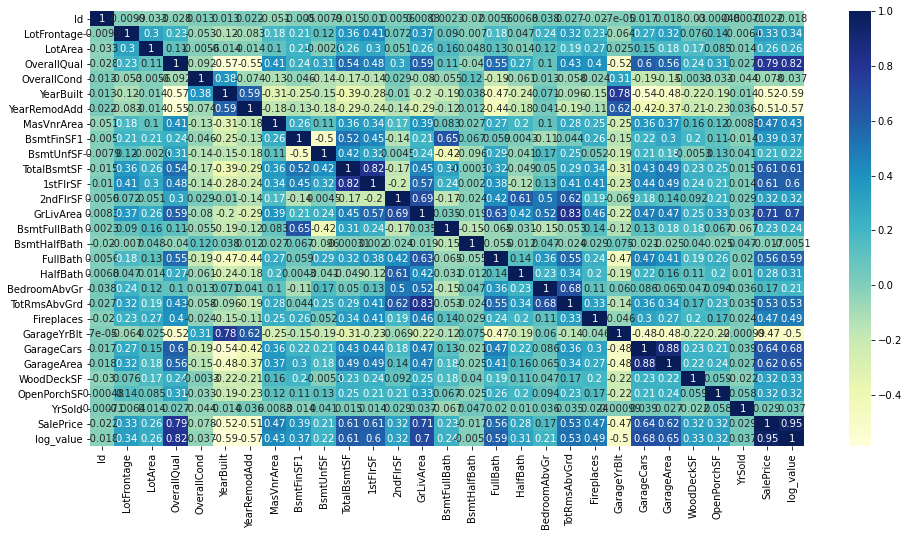

In [95]:
# correlation matrix
cor = housing_numeric.corr()

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [97]:
## Data prep
# split into X and y
X = housing_df.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold']]

y = housing_df['log_value']

In [98]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,HouseStyle,...,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,60,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,2Story,...,Gd,PConc,Gd,No,GLQ,Ex,Gd,NA,Attchd,RFn
1,20,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Story,...,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,60,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,2Story,...,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,70,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,2Story,...,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,60,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,2Story,...,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn


In [99]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [100]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [101]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [102]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the dataframe is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=171)

In [106]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [107]:
##Model Deployment
## Ridge & Lasso Regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.150245,0.275057,0.013749,0.016061,0.0001,{'alpha': 0.0001},-0.095778,-0.097267,-0.104910,-0.091154,...,-0.097559,0.004463,27,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
1,0.011767,0.000983,0.004987,0.000893,0.001,{'alpha': 0.001},-0.095778,-0.097266,-0.104909,-0.091154,...,-0.097558,0.004463,26,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
2,0.011164,0.001715,0.006195,0.001463,0.01,{'alpha': 0.01},-0.095780,-0.097255,-0.104903,-0.091150,...,-0.097554,0.004462,25,-0.078052,-0.067514,-0.072208,-0.079999,-0.077824,-0.075119,0.004605
3,0.012367,0.002146,0.004985,0.001262,0.05,{'alpha': 0.05},-0.095788,-0.097210,-0.104883,-0.091131,...,-0.097537,0.004460,24,-0.078049,-0.067528,-0.072202,-0.080005,-0.077824,-0.075122,0.004602
4,0.011274,0.002217,0.006383,0.001739,0.1,{'alpha': 0.1},-0.095798,-0.097156,-0.104864,-0.091106,...,-0.097517,0.004460,23,-0.078044,-0.067545,-0.072195,-0.080013,-0.077824,-0.075124,0.004599


In [109]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.150245,0.275057,0.013749,0.016061,0.0001,{'alpha': 0.0001},-0.095778,-0.097267,-0.104910,-0.091154,...,-0.097559,0.004463,27,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
1,0.011767,0.000983,0.004987,0.000893,0.001,{'alpha': 0.001},-0.095778,-0.097266,-0.104909,-0.091154,...,-0.097558,0.004463,26,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
2,0.011164,0.001715,0.006195,0.001463,0.01,{'alpha': 0.01},-0.095780,-0.097255,-0.104903,-0.091150,...,-0.097554,0.004462,25,-0.078052,-0.067514,-0.072208,-0.079999,-0.077824,-0.075119,0.004605
3,0.012367,0.002146,0.004985,0.001262,0.05,{'alpha': 0.05},-0.095788,-0.097210,-0.104883,-0.091131,...,-0.097537,0.004460,24,-0.078049,-0.067528,-0.072202,-0.080005,-0.077824,-0.075122,0.004602
4,0.011274,0.002217,0.006383,0.001739,0.1,{'alpha': 0.1},-0.095798,-0.097156,-0.104864,-0.091106,...,-0.097517,0.004460,23,-0.078044,-0.067545,-0.072195,-0.080013,-0.077824,-0.075124,0.004599
5,0.009176,0.000398,0.004787,0.001162,0.2,{'alpha': 0.2},-0.095814,-0.097054,-0.104834,-0.091053,...,-0.097478,0.004465,22,-0.078034,-0.067578,-0.072183,-0.080029,-0.077823,-0.075130,0.004591
6,0.010077,0.001284,0.005384,0.001353,0.3,{'alpha': 0.3},-0.095826,-0.096958,-0.104809,-0.090994,...,-0.097441,0.004474,21,-0.078024,-0.067610,-0.072180,-0.080045,-0.077824,-0.075137,0.004583
7,0.014360,0.001352,0.005785,0.001324,0.4,{'alpha': 0.4},-0.095840,-0.096868,-0.104789,-0.090932,...,-0.097405,0.004485,20,-0.078014,-0.067641,-0.072177,-0.080061,-0.077826,-0.075144,0.004576
8,0.012367,0.003254,0.006780,0.001163,0.5,{'alpha': 0.5},-0.095857,-0.096783,-0.104773,-0.090867,...,-0.097372,0.004499,19,-0.078005,-0.067671,-0.072175,-0.080076,-0.077830,-0.075151,0.004569
9,0.011569,0.001490,0.006382,0.001018,0.6,{'alpha': 0.6},-0.095873,-0.096702,-0.104760,-0.090800,...,-0.097340,0.004514,18,-0.077998,-0.067699,-0.072174,-0.080091,-0.077833,-0.075159,0.004563


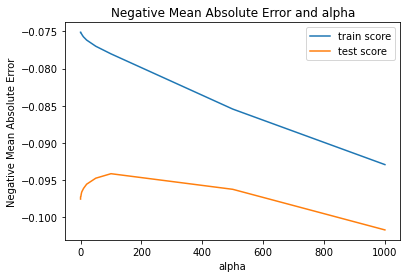

In [110]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [111]:
print("\n The best estimator across ALL searched params:\n",
          model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_cv.best_params_)


 The best estimator across ALL searched params:
 Ridge(alpha=100)

 The best score across ALL searched params:
 -0.09414584560014475

 The best parameters across ALL searched params:
 {'alpha': 100}


In [112]:

#Using the best hyper parameter in the ridge Regression
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.80271628e-03,  1.73903140e-02,  6.28766532e-02,  3.74476105e-02,
       -2.62568097e-02, -2.31702539e-02,  3.17720331e-03, -1.08348294e-03,
        4.27586345e-03,  9.80665331e-03,  2.83588265e-02,  2.46357923e-02,
        4.07317110e-02,  2.15385517e-02,  3.28665045e-04,  2.28668592e-02,
        2.00444399e-02,  1.09856989e-02,  1.81769787e-02,  8.33989794e-03,
       -5.71667258e-03,  2.84044367e-02,  1.64090567e-02,  1.03088771e-02,
       -1.29182493e-03,  5.57504126e-03, -2.08090297e-02, -2.69343477e-03,
       -4.60225130e-03,  3.38822111e-03, -5.94354412e-03,  9.77909352e-03,
        9.62490904e-03, -3.60753593e-03,  1.39589416e-03, -7.13878412e-03,
       -1.55271464e-02, -2.27202191e-02, -8.27012027e-03, -8.53540264e-03,
        1.40358949e-02,  5.66952369e-03,  2.51479887e-02,  1.13397451e-02,
        6.26970027e-03,  4.66621126e-03, -7.97932606e-03,  2.97957888e-03,
        1.02425215e-02,  1.02343206e-02,  1.72015292e-02,  9.21440782e-03,
       -8.12045004e-03, -

In [113]:
# predict for the training dataset
y_train_pred = ridge.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_train), y_pred=np.exp(y_train_pred)))

The training accuracy is:
0.890937913818188


In [114]:

# predict for the test dataset
y_test_pred = ridge.predict(X_test)
print('The testing accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred)))

The testing accuracy is:
0.8873810478530915


In [115]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge.coef_)
list(zip(cols, model_parameters))

[('constant', -0.006802716282671846),
 ('LotFrontage', 0.01739031404154285),
 ('LotArea', 0.06287665319187376),
 ('OverallQual', 0.03744761051702546),
 ('OverallCond', -0.026256809695915994),
 ('YearBuilt', -0.02317025388406811),
 ('YearRemodAdd', 0.003177203313399372),
 ('MasVnrArea', -0.0010834829393459619),
 ('BsmtFinSF1', 0.004275863448854224),
 ('BsmtUnfSF', 0.009806653308973227),
 ('TotalBsmtSF', 0.0283588264973635),
 ('1stFlrSF', 0.02463579229942932),
 ('2ndFlrSF', 0.04073171098883415),
 ('GrLivArea', 0.021538551678002026),
 ('BsmtFullBath', 0.000328665044831243),
 ('BsmtHalfBath', 0.02286685916480497),
 ('FullBath', 0.02004443994223954),
 ('HalfBath', 0.010985698861737744),
 ('BedroomAbvGr', 0.018176978677836072),
 ('TotRmsAbvGrd', 0.008339897936415415),
 ('Fireplaces', -0.005716672577981546),
 ('GarageYrBlt', 0.028404436695828494),
 ('GarageCars', 0.016409056690938537),
 ('GarageArea', 0.010308877095362098),
 ('WoodDeckSF', -0.001291824932236025),
 ('OpenPorchSF', 0.0055750412

In [116]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge.coef_)
ridge_list = list(zip(cols, model_parameters))

In [117]:
final_pred_ridge = []
for i in range(len(ridge_list)):
    if(ridge_list[i][1]!=0):
        final_pred_ridge.append(ridge_list[i][0])
print('Number of predictors selected by optimal alpha for ridge are:{0}'.format(len(final_pred_ridge)))

Number of predictors selected by optimal alpha for ridge are:170


In [118]:
alpha_double = 200
ridge_double = Ridge(alpha=alpha_double)

ridge_double.fit(X_train, y_train)
ridge_double.coef_

array([-3.31383403e-03,  1.54900882e-02,  5.64765985e-02,  3.37464530e-02,
       -2.11240193e-02, -2.36658234e-02,  5.56189351e-03,  3.17082642e-03,
        4.60711885e-03,  1.35203870e-02,  2.71465850e-02,  1.97355464e-02,
        3.59552479e-02,  1.90443425e-02,  1.63960334e-04,  2.15225487e-02,
        1.82958265e-02,  1.06932801e-02,  2.01390903e-02,  1.19501884e-02,
       -7.12561134e-03,  2.56884790e-02,  1.81841183e-02,  1.06505247e-02,
        6.08792477e-05,  4.90169818e-03, -2.06651180e-02, -2.37590609e-03,
       -2.87511434e-03,  3.00854403e-03, -1.94014805e-03,  9.80290838e-03,
        7.19613139e-03, -3.10087194e-03,  1.04488721e-03, -6.41514054e-03,
       -1.20377311e-02, -1.84230647e-02, -7.37423955e-03, -8.13649814e-03,
        1.06702726e-02,  3.36431249e-03,  1.72122371e-02,  1.48519560e-03,
        5.60514366e-03,  4.38369090e-03, -8.91127123e-03,  1.55093943e-03,
        8.31710889e-03,  8.23389040e-03,  1.28531505e-02,  9.63692604e-03,
       -6.65888768e-03, -

In [119]:
# predict
y_train_pred_double = ridge_double.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))

0.9098089180129811


In [120]:
rsquare = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double)
rssbytss = 1-rsquare
rssbytss

0.09019108198701886

In [121]:
y_test_pred = ridge_double.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8783127575513225


In [122]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge_double.coef_)
ridge_doble_list = list(zip(cols, model_parameters))

In [123]:
ridge_doble_list

[('constant', -0.0033138340299703408),
 ('LotFrontage', 0.015490088210253435),
 ('LotArea', 0.05647659850511367),
 ('OverallQual', 0.03374645295005629),
 ('OverallCond', -0.021124019318482404),
 ('YearBuilt', -0.023665823421914315),
 ('YearRemodAdd', 0.005561893512113839),
 ('MasVnrArea', 0.003170826415276789),
 ('BsmtFinSF1', 0.004607118849838767),
 ('BsmtUnfSF', 0.013520387048238073),
 ('TotalBsmtSF', 0.02714658495437745),
 ('1stFlrSF', 0.019735546406889203),
 ('2ndFlrSF', 0.035955247914179776),
 ('GrLivArea', 0.019044342543898862),
 ('BsmtFullBath', 0.00016396033449167817),
 ('BsmtHalfBath', 0.021522548672050383),
 ('FullBath', 0.018295826533374124),
 ('HalfBath', 0.010693280056870027),
 ('BedroomAbvGr', 0.020139090307311647),
 ('TotRmsAbvGrd', 0.011950188408634044),
 ('Fireplaces', -0.007125611335669074),
 ('GarageYrBlt', 0.025688479043949556),
 ('GarageCars', 0.018184118270351896),
 ('GarageArea', 0.010650524695952502),
 ('WoodDeckSF', 6.0879247741659325e-05),
 ('OpenPorchSF', 0.0

In [124]:
final_pred_ridge_double =[]
for i in range(len(ridge_doble_list)):
    if(ridge_doble_list[i][1]!=0):
        final_pred_ridge_double.append(ridge_doble_list[i][0])
print('Number of predictors selected by double the optimal alpha for ridge are:{0}'.format(len(final_pred_ridge_double)))

Number of predictors selected by double the optimal alpha for ridge are:170


In [125]:
## lASSO REGREESION
# list of alphas to tune
params = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01]}


lasso = Lasso()

# cross validation
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [126]:
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.150245,0.275057,0.013749,0.016061,0.0001,{'alpha': 0.0001},-0.095778,-0.097267,-0.104910,-0.091154,...,-0.097559,0.004463,27,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
1,0.011767,0.000983,0.004987,0.000893,0.001,{'alpha': 0.001},-0.095778,-0.097266,-0.104909,-0.091154,...,-0.097558,0.004463,26,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
2,0.011164,0.001715,0.006195,0.001463,0.01,{'alpha': 0.01},-0.095780,-0.097255,-0.104903,-0.091150,...,-0.097554,0.004462,25,-0.078052,-0.067514,-0.072208,-0.079999,-0.077824,-0.075119,0.004605
3,0.012367,0.002146,0.004985,0.001262,0.05,{'alpha': 0.05},-0.095788,-0.097210,-0.104883,-0.091131,...,-0.097537,0.004460,24,-0.078049,-0.067528,-0.072202,-0.080005,-0.077824,-0.075122,0.004602
4,0.011274,0.002217,0.006383,0.001739,0.1,{'alpha': 0.1},-0.095798,-0.097156,-0.104864,-0.091106,...,-0.097517,0.004460,23,-0.078044,-0.067545,-0.072195,-0.080013,-0.077824,-0.075124,0.004599


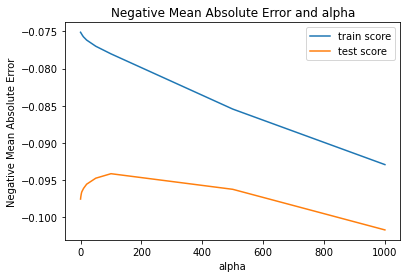

In [127]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [128]:
print("\n The best estimator across ALL searched params:\n",
          model_lasso_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_lasso_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_lasso_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.001)

 The best score across ALL searched params:
 -0.09291881873263372

 The best parameters across ALL searched params:
 {'alpha': 0.001}


In [129]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [130]:
lasso.coef_

array([-9.99578312e-03,  1.84249397e-02,  7.51006739e-02,  4.17795743e-02,
       -4.75934387e-02, -2.11751767e-02, -0.00000000e+00, -0.00000000e+00,
        4.68766402e-03,  0.00000000e+00,  8.74891105e-05,  0.00000000e+00,
        9.91391956e-02,  2.36554998e-02,  0.00000000e+00,  1.93155608e-02,
        1.68519902e-02,  8.76654530e-03,  9.28262428e-03,  0.00000000e+00,
       -9.31605582e-04,  4.21052728e-02,  5.05697748e-03,  8.98906817e-03,
       -3.73570945e-04,  4.26484769e-03, -2.12996008e-02, -3.01766081e-03,
       -7.45831854e-04,  1.30575747e-03, -1.88064634e-02,  3.05935938e-03,
        3.01643296e-03, -4.10256654e-03,  0.00000000e+00, -7.41564343e-03,
       -1.79686245e-02, -3.42160823e-02, -9.32049888e-03, -8.87856675e-03,
        4.26874672e-02,  2.14062882e-02,  8.84176590e-02,  5.99136884e-02,
        5.03382218e-03,  4.32384060e-03, -6.25009374e-03,  2.25850481e-03,
        1.14876219e-02,  1.29799730e-02,  2.17042536e-02,  7.59250636e-03,
       -7.52751026e-03, -

In [131]:
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))

In [133]:
lasso_list

[('constant', -0.009995783124817298),
 ('LotFrontage', 0.018424939673390973),
 ('LotArea', 0.07510067387513485),
 ('OverallQual', 0.04177957426537631),
 ('OverallCond', -0.0475934386812589),
 ('YearBuilt', -0.021175176662136745),
 ('YearRemodAdd', -0.0),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.004687664021656259),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 8.748911050118316e-05),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.09913919561888089),
 ('GrLivArea', 0.02365549984606827),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.019315560813582346),
 ('FullBath', 0.01685199023061048),
 ('HalfBath', 0.008766545304624238),
 ('BedroomAbvGr', 0.009282624280083869),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -0.0009316055822936864),
 ('GarageYrBlt', 0.04210527281376895),
 ('GarageCars', 0.005056977481924695),
 ('GarageArea', 0.008989068165814872),
 ('WoodDeckSF', -0.0003735709451526654),
 ('OpenPorchSF', 0.004264847685300734),
 ('YrSold', -0.021299600844254578),
 ('MSSubClass_30', -0.0030176608129431704),
 ('MSS

In [135]:
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.9183979804109303
The test accuracy is:
0.8851756193022349


In [136]:
final_pred_lasso =[]
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        final_pred_lasso.append(lasso_list[i][0])
print('Number of predictors selected by optimaloptimal alpha for ridge are:{0}'.format(len(final_pred_lasso)))

Number of predictors selected by optimaloptimal alpha for ridge are:127


In [137]:
lm_double = Lasso(alpha=0.002)
lm_double.fit(X_train, y_train)

# predict
y_train_pred_double = lm_double.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))
y_test_pred_double = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_double))

The training accuracy is:
0.9114997487189402
The test accuracy is:
0.8851756193022349


In [138]:
model_parameters = list(lm_double.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lm_double.coef_)
a = list(zip(cols, model_parameters))
#List of all predictors with non zero co-efficients

final_pred =[]
for i in range(len(a)):
    if(a[i][1]!=0):
        final_pred.append(a[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_pred)))

Number of predictors selected by double the optimal alpha for lasso are:113


In [139]:

d = len(final_pred)

In [140]:
d

113

In [141]:
n = len(X)

In [143]:
##Removing the top 5 contributors from the lasso regression
###for the Questions 3 of the part 2
X_train_new = X_train.drop(['2ndFlrSF', 'MSZoning_RH', 'LotArea', 'MSZoning_RL', 'MSSubClass_190'], axis=1)

In [144]:
X_test_new = X_test.drop(['2ndFlrSF', 'MSZoning_RH', 'LotArea', 'MSZoning_RL', 'MSSubClass_190'], axis=1)

In [145]:
X_train_new.columns

Index(['LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=166)

In [146]:
model_lasso_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [147]:
cv_results_lasso = pd.DataFrame(model_lasso_cv.cv_results_)

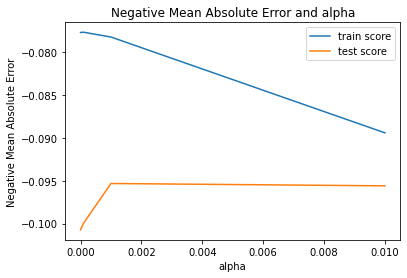

In [148]:

# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [149]:
print("\n The best estimator across ALL searched params:\n",
          model_lasso_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_lasso_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_lasso_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.001)

 The best score across ALL searched params:
 -0.09532464636529799

 The best parameters across ALL searched params:
 {'alpha': 0.001}


In [150]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_new, y_train)

Lasso(alpha=0.001)

In [151]:
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))

In [152]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_new, y_train)

# predict
y_train_pred = lm.predict(X_train_new)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_new)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.9137709634530005
The test accuracy is:
0.8822024070495237


In [153]:
final_lasso_new_pred =[]
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        final_lasso_new_pred.append(lasso_list[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_lasso_new_pred)))

Number of predictors selected by double the optimal alpha for lasso are:129
